In [193]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import diff,symbols,lambdify

In [194]:
def f(x):
    return 7/16 + 5/8 * (x**2) - 1/15.998 * (x**4)

In [195]:
symb_x = symbols('x')
symb_func = f(symb_x)
symb_f_prime = diff(symb_func,symb_x)
symb_f_pprime = diff(symb_f_prime,symb_x)
symb_f_pprime

1.25 - 0.750093761720215*x**2

In [196]:
f_prime = lambdify(symb_x,symb_f_prime)
f_ppriem = lambdify(symb_x,symb_f_pprime)

In [197]:
def find_approx(x0):
    """f''(x_0)/2 (x-x_0)^2 + f'(x_0)(x-x_0)+f(x_0)"""
    double_prime = f_ppriem(x0)
    prime = f_prime(x0)
    def approx_func(x):
        return double_prime/2*(x-x0)**2+prime*(x-x0)+f(x0)
    best_x = -prime/double_prime+x0
    return approx_func,(best_x,f(best_x))

def Newton(start_x,plot_objs:list,alpha=None):
    numpy_x = np.linspace(-2,2,100)
    for i,plot_obj in enumerate(plot_objs):
        appx_func,best_pt = find_approx(start_x)
        old_best_pt = best_pt 
        if alpha is not None:
            best_pt_x = best_pt[0]*alpha+start_x*(1-alpha)
            best_pt = (best_pt_x,f(best_pt_x))
        curr_pt = (start_x,f(start_x))
        plot_obj.scatter(*curr_pt,color='black',marker='o',s=10)
        plot_obj.scatter(0,7/16,color='black',marker='*',s=100) # best point
        plot_obj.scatter(*best_pt,color='black',marker='o',s=10)
        plot_obj.plot(numpy_x, f(numpy_x))
        plot_obj.plot(numpy_x, appx_func(numpy_x),color='red')
        plot_obj.axvline(x=old_best_pt[0], linestyle='--', color='black')
        plot_obj.annotate('', xy=best_pt, xytext=curr_pt, arrowprops=dict(arrowstyle='->',color='blue' if alpha is None else 'green'))
        if alpha is not None:
            plot_obj.scatter(*old_best_pt,color='red',marker='*',s=20)
            plot_obj.annotate('', xy=old_best_pt, xytext=curr_pt, arrowprops=dict(arrowstyle='->',color='blue'))


        plot_obj.set_xlabel('x')
        plot_obj.set_ylabel('y')
        plot_obj.set_xticks([])
        plot_obj.set_yticks([])
        plot_obj.grid(True)
        plot_obj.set_title(f'Iteration {i}')

        start_x = best_pt[0]

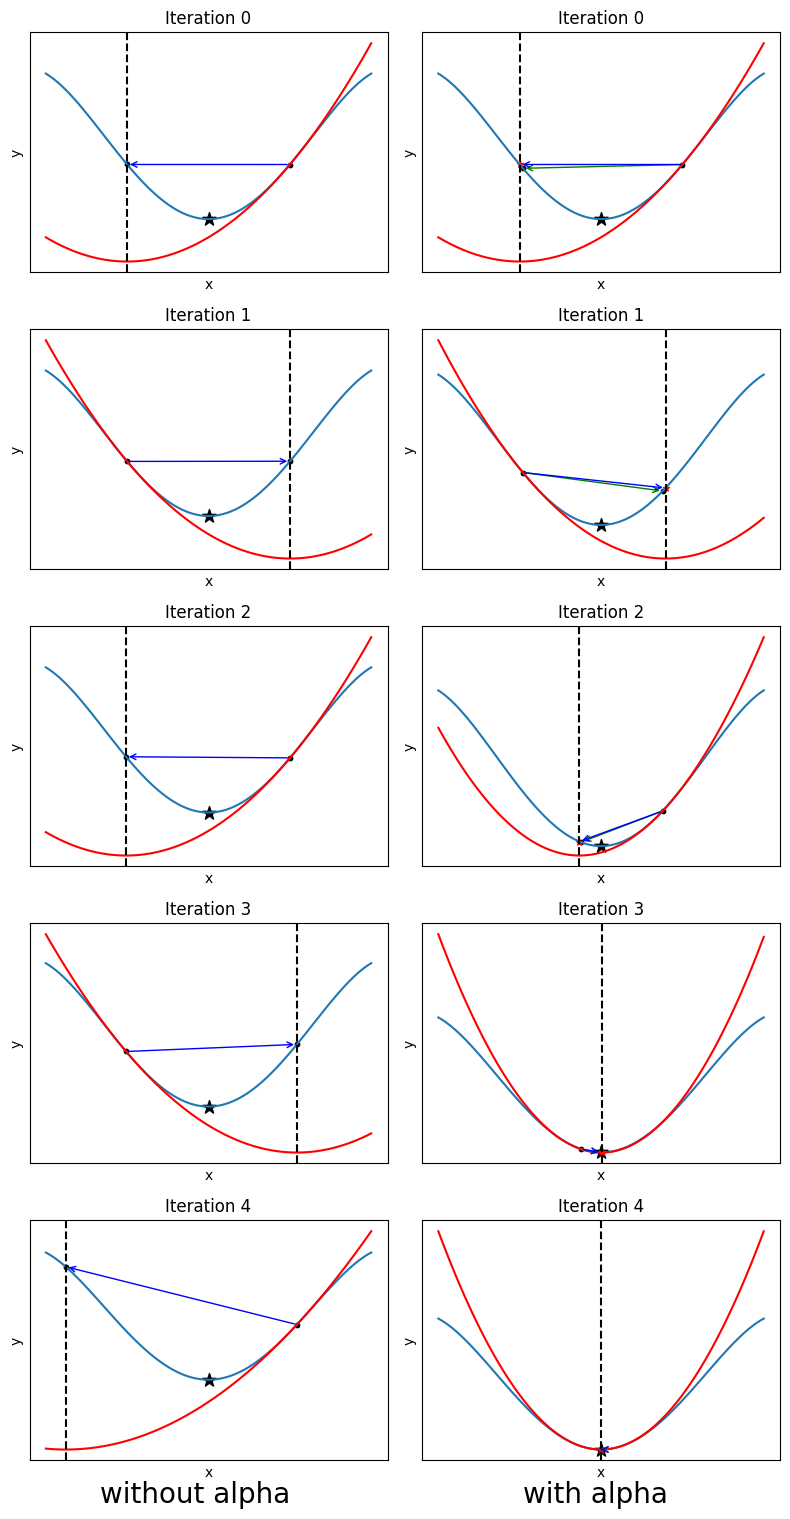

In [198]:
iters = 5
fig, axs = plt.subplots(iters, 2, figsize=(8, 3*iters))
Newton(1,[axs[i][0] for i in range(iters)])
Newton(1,[axs[i][1] for i in range(iters)],alpha=0.98)
fig.text(0.25, 0, 'without alpha', ha='center', va='center', fontsize=20)

fig.text(0.75, 0, 'with alpha', ha='center', va='center', fontsize=20)

plt.tight_layout()
plt.show()